## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "../Mouse_metadata.csv"
study_results = "../Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_df = pd.merge(mouse_metadata, study_results, on=["Mouse ID"])

#Set Index Column to Mouse ID
#mouse_df = mouse_df.set_index("Mouse ID")
mouse_df.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
mouse_df.dtypes

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [3]:
mouse_df.shape

(1893, 8)

## Summary statistics

In [4]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#Groupby and Stat Metrics
regimen_tumor_vol = mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"]
regimen_tumor_vol_mean = regimen_tumor_vol.mean()
regimen_tumor_vol_median = regimen_tumor_vol.median()
regimen_tumor_vol_std = regimen_tumor_vol.std()
regimen_tumor_vol_sem = regimen_tumor_vol.sem()


summary_regimen_stat_table_df = pd.DataFrame({
    "Tumor Volume Mean": regimen_tumor_vol_mean,
    "Tumor Volume Median": regimen_tumor_vol_median,
    "Tumor Volume Standard Deviation": regimen_tumor_vol_std,
    "Tumor Volume SEM": regimen_tumor_vol_sem
})

sorted_summary_regimen_stat_table_df = summary_regimen_stat_table_df.sort_values(by="Tumor Volume SEM", ascending=True)
sorted_summary_regimen_stat_table_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,
Ramicane,40.216745,40.673236,4.846308,0.320955
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Propriva,52.322552,50.854632,6.507770,0.512884
Zoniferol,53.236507,51.818479,6.966589,0.516398
Stelasyn,54.233149,52.431737,7.710419,0.573111
Placebo,54.033581,52.288934,7.821003,0.581331
Naftisol,54.331565,52.509285,8.134708,0.596466


In [5]:
regimen_counts_df = pd.DataFrame(mouse_df["Drug Regimen"].value_counts())
regimen_counts_df.reset_index(inplace=True)
regimen_counts_df = regimen_counts_df.rename(columns={"index": "Drug Regimen", "Drug Regimen": "Regimen Count"})
regimen_counts_df

,Drug Regimen,Regimen Count
0,Capomulin,230
1,Ramicane,228
2,Ketapril,188
3,Naftisol,186
4,Zoniferol,182
5,Stelasyn,181
6,Placebo,181
7,Infubinol,178
8,Ceftamin,178
9,Propriva,161


## Bar plots

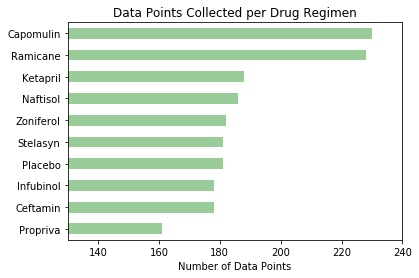

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
regimen_counts_df.plot(x="Drug Regimen", y="Regimen Count", kind="barh", alpha=0.4, facecolor="green", legend=False)
plt.title("Data Points Collected per Drug Regimen")
plt.xlabel("Number of Data Points")
plt.xlim(130,240)
plt.ylabel("")
plt.gca().invert_yaxis()
plt.show()

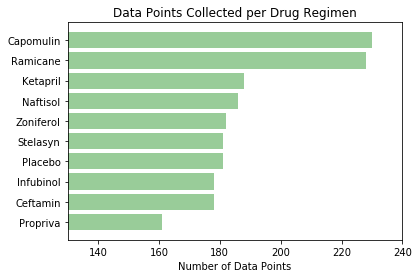

In [7]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
data_points_fig = plt.figure()

plt.barh(regimen_counts_df["Drug Regimen"], regimen_counts_df["Regimen Count"], alpha=0.4, facecolor="Green")
plt.title("Data Points Collected per Drug Regimen")
plt.xlabel("Number of Data Points")
plt.xlim(130,240)
plt.ylabel("")
plt.gca().invert_yaxis()

plt.show()

## Pie plots

In [8]:
mouse_gender_count_df = pd.DataFrame(mouse_df["Sex"].value_counts())
#mouse_gender_count_df.reset_index(inplace=True)
mouse_gender_count_df = mouse_gender_count_df.rename(columns={"Sex": ""})
#regimen_counts_df

mouse_gender_count_df

,
Male,958
Female,935


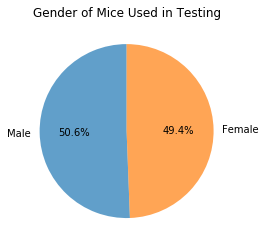

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_gender_count_df.plot(y="", kind="pie", startangle=90, autopct="%1.1f%%", legend=False, wedgeprops={'alpha':0.7})

plt.title("Gender of Mice Used in Testing")
plt.show()

In [10]:
mouse_gender_count_pyplot_df = pd.DataFrame(mouse_df["Sex"].value_counts())
mouse_gender_count_pyplot_df.reset_index(inplace=True)
mouse_gender_count_pyplot_df = mouse_gender_count_pyplot_df.rename(columns={"index": "Gender", "Sex": "Count"})

mouse_gender_count_pyplot_df

,Gender,Count
0,Male,958
1,Female,935


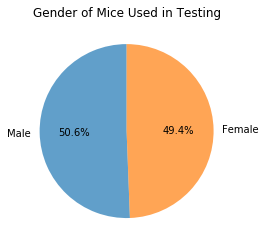

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_gender_count_pyplot_df["Count"], labels=mouse_gender_count_pyplot_df["Gender"], startangle=90, 
        autopct="%1.1f%%", wedgeprops={'alpha':0.7}
)

plt.title("Gender of Mice Used in Testing")
plt.show()

## Quartiles, outliers and boxplots

In [12]:
mouse_df.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [13]:
top_four = list(sorted_summary_regimen_stat_table_df.nsmallest(4, "Tumor Volume SEM").index)
top_four

['Ramicane', 'Capomulin', 'Ceftamin', 'Infubinol']

In [14]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 

ramicane = (mouse_df["Drug Regimen"] == top_four[0])
capomulin = (mouse_df["Drug Regimen"] == top_four[1])
ceftamin = (mouse_df["Drug Regimen"] == top_four[2])
infubinol = (mouse_df["Drug Regimen"] == top_four[3])

top_four_regimen_df = mouse_df.loc[(ramicane | capomulin | ceftamin | infubinol), :]
top_four_regimen_df

mouse_group_top_four = top_four_regimen_df.groupby(["Drug Regimen", "Mouse ID"])["Tumor Volume (mm3)"]
sum_tumor = mouse_group_top_four.last()
sum_tumor_df = pd.DataFrame(sum_tumor)
sum_tumor_df


Tumor Volume (mm3)
Drug Regimen Mouse ID                    
Capomulin    b128               38.982878
             b742               38.939633
             f966               30.485985
             g288               37.074024
             g316               40.159220
...                                   ...
Ramicane     s508               30.276232
             u196               40.667713
             w678               43.166373
             y449               44.183451
             z578               30.638696

[100 rows x 1 columns]

Data for Ramicane
The lower quartile of tumor volume is: 31.56046955
The upper quartile of tumor volume is: 40.65900627
The interquartile range of tumor volume is: 9.098536719999998
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.




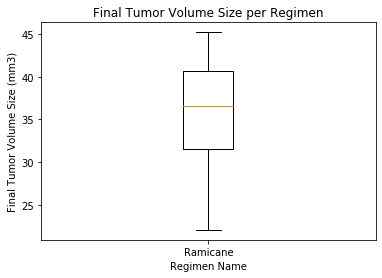

Data for Capomulin
The lower quartile of tumor volume is: 32.37735684
The upper quartile of tumor volume is: 40.1592203
The interquartile range of tumor volume is: 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.




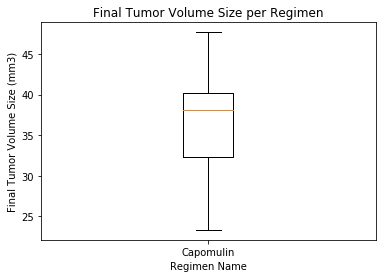

Data for Ceftamin
The lower quartile of tumor volume is: 48.72207785
The upper quartile of tumor volume is: 64.29983003
The interquartile range of tumor volume is: 15.577752179999997
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.




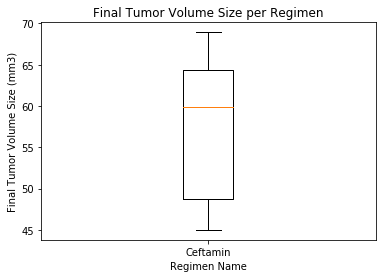

Data for Infubinol
The lower quartile of tumor volume is: 54.04860769
The upper quartile of tumor volume is: 65.52574285
The interquartile range of tumor volume is: 11.477135160000003
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.




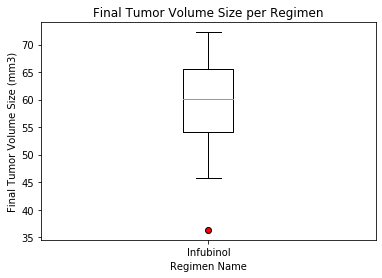

In [41]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for regimen in top_four:
    top_four_regimen_df = mouse_df.loc[mouse_df["Drug Regimen"] == regimen, :]
    mouse_group_top_four = top_four_regimen_df.groupby(["Drug Regimen", "Mouse ID"])["Tumor Volume (mm3)"]
    sum_tumor = mouse_group_top_four.last()
    sum_tumor_df = pd.DataFrame(sum_tumor)
    
    quartiles = sum_tumor_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])

    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    print(f"Data for {regimen}")
    print(f"The lower quartile of tumor volume is: {lowerq}")
    print(f"The upper quartile of tumor volume is: {upperq}")
    print(f"The interquartile range of tumor volume is: {iqr}")
    #print(f"The the median of tumor volume is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print()
    outlier_cond = (sum_tumor_df["Tumor Volume (mm3)"] < lower_bound) | (sum_tumor_df["Tumor Volume (mm3)"] > upper_bound)
    outlier_tumor_volume = sum_tumor_df.loc[outlier_cond]
    #print(outlier_tumor_volume.head())
    print()
    
    plt.boxplot(sum_tumor_df["Tumor Volume (mm3)"], flierprops=dict(markerfacecolor='r', marker='o'))
    plt.title("Final Tumor Volume Size per Regimen")
    plt.xlabel("Regimen Name")
    plt.ylabel("Final Tumor Volume Size (mm3)")
    plt.xticks([1], {regimen})
    plt.show()
    #print(sum_tumor_df.head())


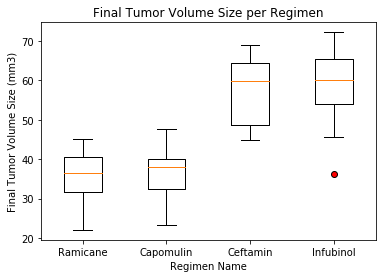

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
top_four_regimen_df = mouse_df.loc[mouse_df["Drug Regimen"] == top_four[0], :]
mouse_group_top_four = top_four_regimen_df.groupby(["Drug Regimen", "Mouse ID"])["Tumor Volume (mm3)"]
sum_tumor = mouse_group_top_four.last()
sum_tumor_df_0 = pd.DataFrame(sum_tumor)

top_four_regimen_df = mouse_df.loc[mouse_df["Drug Regimen"] == top_four[1], :]
mouse_group_top_four = top_four_regimen_df.groupby(["Drug Regimen", "Mouse ID"])["Tumor Volume (mm3)"]
sum_tumor = mouse_group_top_four.last()
sum_tumor_df_1 = pd.DataFrame(sum_tumor)

top_four_regimen_df = mouse_df.loc[mouse_df["Drug Regimen"] == top_four[2], :]
mouse_group_top_four = top_four_regimen_df.groupby(["Drug Regimen", "Mouse ID"])["Tumor Volume (mm3)"]
sum_tumor = mouse_group_top_four.last()
sum_tumor_df_2 = pd.DataFrame(sum_tumor)

top_four_regimen_df = mouse_df.loc[mouse_df["Drug Regimen"] == top_four[3], :]
mouse_group_top_four = top_four_regimen_df.groupby(["Drug Regimen", "Mouse ID"])["Tumor Volume (mm3)"]
sum_tumor = mouse_group_top_four.last()
sum_tumor_df_3 = pd.DataFrame(sum_tumor)

plt.boxplot([
    sum_tumor_df_0["Tumor Volume (mm3)"], 
    sum_tumor_df_1["Tumor Volume (mm3)"], 
    sum_tumor_df_2["Tumor Volume (mm3)"], 
    sum_tumor_df_3["Tumor Volume (mm3)"]],
    flierprops=dict(markerfacecolor='r', marker='o')
)
plt.title("Final Tumor Volume Size per Regimen")
plt.xlabel("Regimen Name")
plt.ylabel("Final Tumor Volume Size (mm3)")
labels = [top_four[0], top_four[1], top_four[2], top_four[3]]
plt.xticks([1, 2, 3, 4], labels)
plt.show()

## Line and scatter plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen